In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
x_train = x_train/ 255
x_test = x_test/ 255

In [27]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

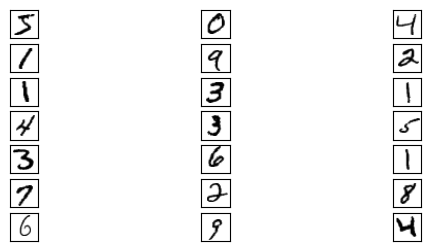

In [28]:
plt.figure(figsize=(7,3))
for i in range(21):
    plt.subplot (7,3, i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [29]:
model = keras.Sequential([
    Flatten(input_shape= (28,28,1)), 
    Dense(128, activation='relu'), 
    Dense(10, activation = 'softmax')
])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9891 - loss: 0.0369 - val_accuracy: 0.9722 - val_loss: 0.0964
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 518us/step - accuracy: 0.9905 - loss: 0.0318 - val_accuracy: 0.9746 - val_loss: 0.0885
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 0.9758 - val_loss: 0.0887
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.9942 - loss: 0.0190 - val_accuracy: 0.9756 - val_loss: 0.0875
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.9952 - loss: 0.0160 - val_accuracy: 0.9753 - val_loss: 0.0958


In [32]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.9749 - loss: 0.0831


[0.07281740754842758, 0.9771999716758728]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[4.01037675e-10 1.09372252e-06 1.25397568e-08 9.99882698e-01
  3.73670117e-09 1.00137986e-04 1.26364808e-10 4.46936099e-10
  1.57069535e-05 3.54785897e-07]]
Распознанная цифра: 3


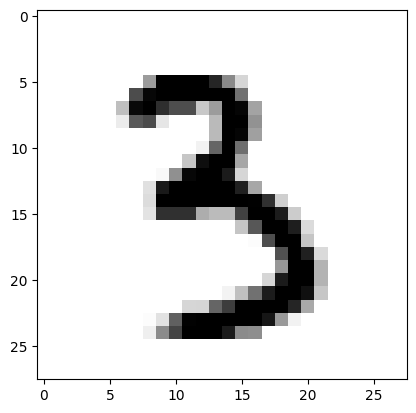

In [33]:
n = 32


x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np.argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [34]:
model.save('model.h5')